<a href="https://colab.research.google.com/github/adeni-7007/low-code-book-projects/blob/main/Customer_churn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import tensorflow as tf

In [42]:
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("seaborn version:", sns.__version__)
print("scikit-learn version:", sklearn.__version__)
print("TensorFlow version:", tf.__version__)

numpy version: 1.23.5
pandas version: 1.5.3
seaborn version: 0.12.2
scikit-learn version: 1.2.2
TensorFlow version: 2.14.0


In [43]:
file_loc = 'https://storage.googleapis.com/low-code-ai-book/churn_dataset.csv'
df_raw = pd.read_csv(file_loc)

In [44]:
df_raw.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


dtypes без скобок, потому что это не функция, а свойство ддата-фрейма Пандас df_raw

In [45]:
df_raw.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

можно работать с отдельным столбцом данных:

In [46]:
df_raw['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [47]:
mask = (df_raw['TotalCharges']==' ')
df_raw[mask]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


mask - это вроде фильтра:

In [48]:
mask = (df_raw['tenure']==0)
df_raw[mask]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [49]:
df_raw[mask][['tenure', 'TotalCharges']]

,tenure,TotalCharges
488,0,
753,0,
936,0,
1082,0,
1340,0,
3331,0,
3826,0,
4380,0,
5218,0,
6670,0,


In [50]:
df_1 = df_raw.replace({'TotalCharges': {' ': 0.0}})
mask = (df_raw['tenure']==0)
df_1[mask][['tenure', 'TotalCharges']]

,tenure,TotalCharges
488,0,0.0
753,0,0.0
936,0,0.0
1082,0,0.0
1340,0,0.0
3331,0,0.0
3826,0,0.0
4380,0,0.0
5218,0,0.0
6670,0,0.0


In [51]:
df_2 = df_1.astype({'TotalCharges': 'float64'})
df_2.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [52]:
df_2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [53]:
df_2.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [54]:
df_2.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [55]:
df_2.value_counts(['PhoneService','MultipleLines'])

PhoneService  MultipleLines   
Yes           No                  3390
              Yes                 2971
No            No phone service     682
dtype: int64

In [56]:
df_2.value_counts(['InternetService', 'OnlineSecurity'])

InternetService  OnlineSecurity     
Fiber optic      No                     2257
No               No internet service    1526
DSL              No                     1241
                 Yes                    1180
Fiber optic      Yes                     839
dtype: int64

In [57]:
df_2.value_counts(['InternetService','OnlineBackup'])

InternetService  OnlineBackup       
Fiber optic      No                     1753
No               No internet service    1526
Fiber optic      Yes                    1343
DSL              No                     1335
                 Yes                    1086
dtype: int64

In [58]:
df_2.value_counts(['InternetService', 'StreamingTV'])

InternetService  StreamingTV        
Fiber optic      Yes                    1750
No               No internet service    1526
DSL              No                     1464
Fiber optic      No                     1346
DSL              Yes                     957
dtype: int64

In [59]:
df_2.value_counts(['InternetService','StreamingMovies'])

InternetService  StreamingMovies    
Fiber optic      Yes                    1751
No               No internet service    1526
DSL              No                     1440
Fiber optic      No                     1345
DSL              Yes                     981
dtype: int64

In [60]:
df_2.value_counts(['InternetService', 'DeviceProtection'])

InternetService  DeviceProtection   
Fiber optic      No                     1739
No               No internet service    1526
Fiber optic      Yes                    1357
DSL              No                     1356
                 Yes                    1065
dtype: int64

In [61]:
df_2.value_counts(['InternetService', 'TechSupport'])

InternetService  TechSupport        
Fiber optic      No                     2230
No               No internet service    1526
DSL              No                     1243
                 Yes                    1178
Fiber optic      Yes                     866
dtype: int64

In [62]:
df_2.value_counts(['Contract', 'Churn'])

Contract        Churn
Month-to-month  No       2220
                Yes      1655
Two year        No       1647
One year        No       1307
                Yes       166
Two year        Yes        48
dtype: int64

<Axes: xlabel='Contract'>

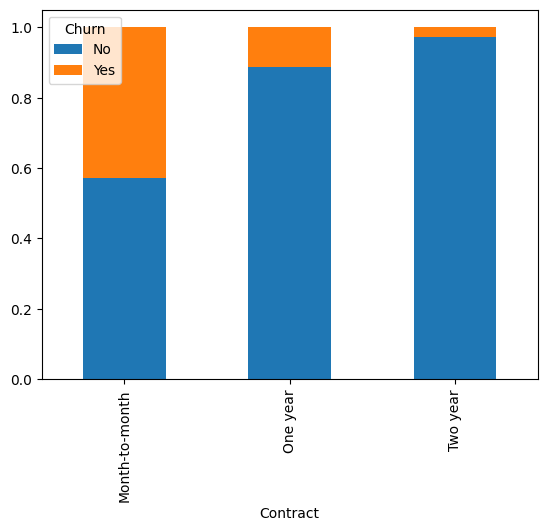

In [63]:
(df_2.groupby('Contract')['Churn'].value_counts(normalize=True).unstack('Churn').plot.bar(stacked=True))

In [64]:
def plot_cat_feature_dist(feature_name):
  df_2.groupby(feature_name)['Churn'].value_counts(normalize=True).unstack('Churn').plot.bar(stacked=True)

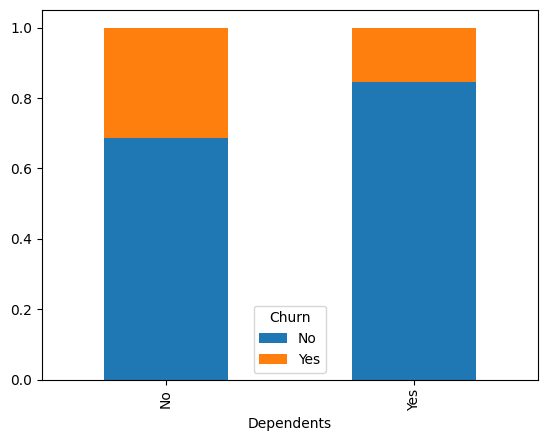

In [65]:
plot_cat_feature_dist('Dependents')

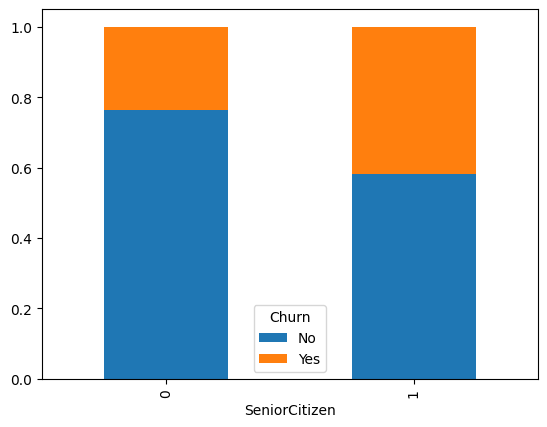

In [66]:
plot_cat_feature_dist('SeniorCitizen')

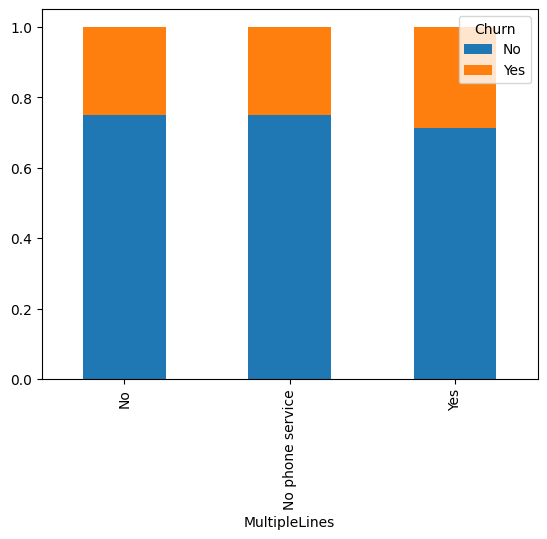

In [67]:
plot_cat_feature_dist('MultipleLines')

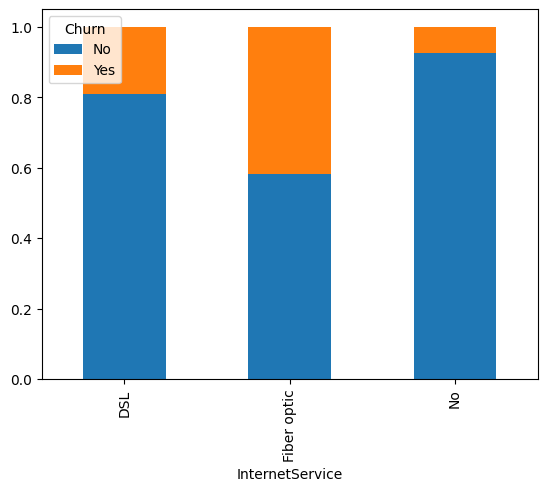

In [68]:
plot_cat_feature_dist('InternetService')

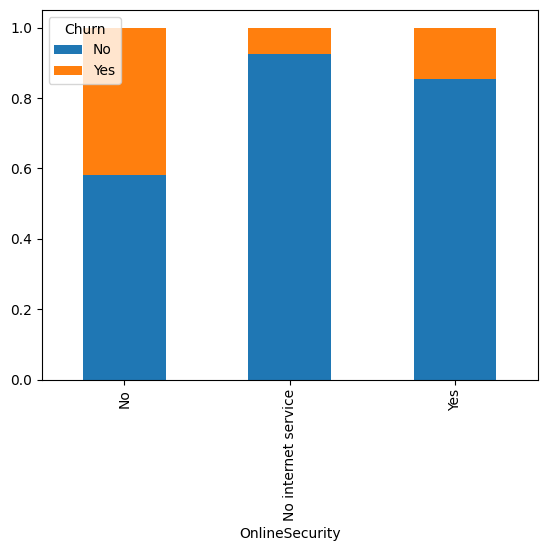

In [69]:
plot_cat_feature_dist('OnlineSecurity')

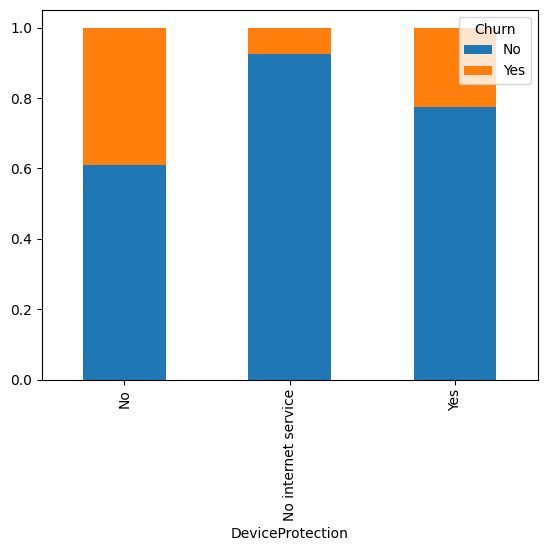

In [70]:
plot_cat_feature_dist('DeviceProtection')

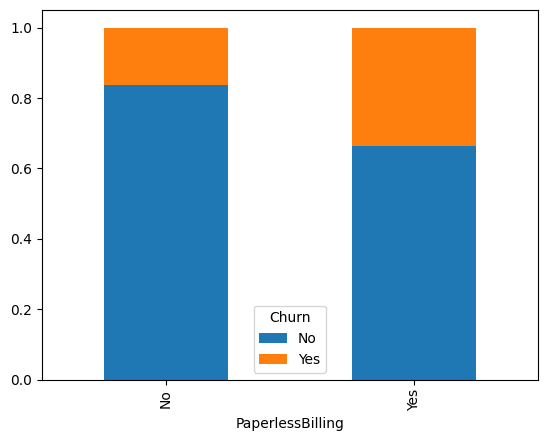

In [71]:
plot_cat_feature_dist('PaperlessBilling')

In [72]:
df_2['AvgMonthlyCharge'] = df_2['TotalCharges']/df_2['tenure']
df_2['DiffCharges'] = df_2['MonthlyCharges']-df_2['AvgMonthlyCharge']
df_2['DiffCharges'].describe()

count    7032.000000
mean       -0.001215
std         2.616165
min       -18.900000
25%        -1.160179
50%         0.000000
75%         1.147775
max        19.125000
Name: DiffCharges, dtype: float64

In [73]:
df_2['AvgMonthlyCharge'] = (df_2['TotalCharges'].div(df_2['tenure']).replace(np.nan,0))
df_2['DiffCharges']=df_2['MonthlyCharges']-df_2['AvgMonthlyCharge']
df_2['DiffCharges'].describe()

count    7043.000000
mean        0.063475
std         3.211815
min       -18.900000
25%        -1.159091
50%         0.000000
75%         1.154880
max        80.850000
Name: DiffCharges, dtype: float64

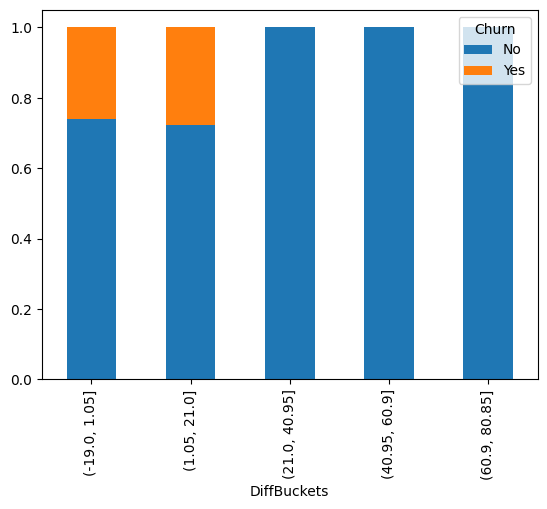

In [74]:
df_2['DiffBuckets'] = pd.cut(df_2['DiffCharges'], bins=5)
plot_cat_feature_dist('DiffBuckets')

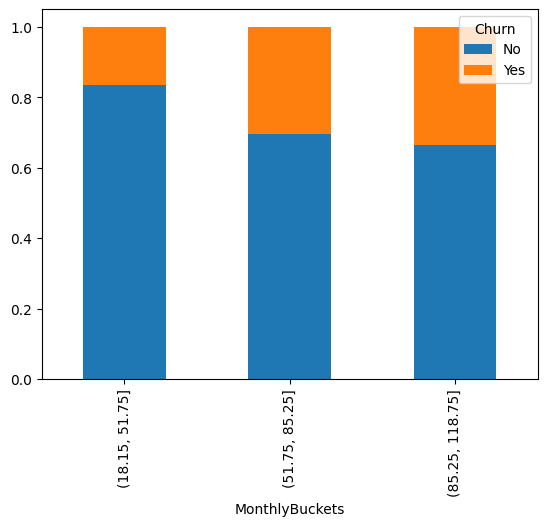

In [75]:
df_2['MonthlyBuckets'] = pd.cut(df_2['MonthlyCharges'], bins = 3)
plot_cat_feature_dist('MonthlyBuckets')

Churn - отток клиентов

'TenureBuckets', 'TotalBuckets' - сделать

In [76]:
df_3 = df_2.copy()
df_3 = df_3.drop(columns=['gender', 'StreamingTV', 'StreamingMovies', 'PhoneService'])
df_3.columns

Index(['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'AvgMonthlyCharge', 'DiffCharges', 'DiffBuckets', 'MonthlyBuckets'],
      dtype='object')

Удаляем лишние столбцы с помощью panda.drop

In [77]:
df_3 = df_3.drop(columns = ['TotalCharges', 'AvgMonthlyCharge', 'DiffCharges', 'MonthlyBuckets'])

In [78]:
df_3 = df_3.drop(columns=['customerID'])

In [79]:
df_3.dtypes

SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
Churn                 object
DiffBuckets         category
dtype: object

In [80]:
df_prep = df_3.replace('No internet service', 'No')
df_prep[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']].nunique()

OnlineSecurity      2
OnlineBackup        2
DeviceProtection    2
TechSupport         2
dtype: int64

In [89]:
from sklearn.preprocessing import OneHotEncoder
numeric_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
categorical_columns = ['Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'DiffBuckets']
X_num = df_prep[numeric_columns]
X_cat = df_prep[categorical_columns]

ohe = OneHotEncoder(drop='if_binary')
X_cat_trans = ohe.fit_transform(X_cat)
print('X_num shape: ', X_num.shape)
print('X_cat_trans shape: ', X_cat_trans.shape)

X_num shape:  (7043, 3)
X_cat_trans shape:  (7043, 25)


One-hot encoding is a process of transforming a categorical feature with independent values to a numeric representation. One Integer for one possible value

In [83]:
#X_cat_trans.toarray()[0]
#ohe.inverse_transform(X_cat_trans.toarray())[0]

Combine the numeric features and the encoded categorical fea‐ tures back into a single object. The one-hot encoded categorical features are returned as a NumPy array, so you will need to convert the Pandas DataFrame to a NumPy array and concatenate the arrays into a single array. Additionally, you will need to create a NumPy array for the label Churn.

In [84]:
X = np.concatenate((X_num.values, X_cat_trans.toarray()), axis=1)
y = df_prep['Churn'].values

Generalization and Data Splitting:

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=113)
X_train.shape

(5634, 28)

Build and train Logistic Regression Model
(loss function - cross-entropy)

In [90]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()
cls.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

cls = LogisticRegression()
cls.fit(X_train_scaled, y_train)

LogisticRegression()

In [92]:
cls.score(X_test, y_test)

0.47764371894960966

In [93]:
X_test_scaled=scaler.transform(X_test)
cls.score(X_test_scaled, y_test)

0.8005677785663591

evaluate the model
(Accuracy = 80%):

In [95]:
from sklearn.metrics import confusion_matrix
y_pred = cls.predict(X_test_scaled)
confusion_matrix(y_test, y_pred, labels=['Yes', 'No'])

array([[185, 187],
       [ 94, 943]])

In [96]:
from sklearn.metrics import precision_score, recall_score
print('Precision:', precision_score(y_test, y_pred, labels = ['Yes', 'No'], pos_label='Yes'))
print('Recall:', recall_score(y_test, y_pred, labels = ['Yes', 'No'], pos_label='Yes'))

Precision: 0.6630824372759857
Recall: 0.49731182795698925
